In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Ohio_COVID.csv",header = 0)
df = pd.DataFrame(data)
df

,Day of Onset Dt,Adams,Allen,Ashland,Ashtabula,Athens,Auglaize,Belmont,Brown,Butler,...,Union,Van Wert,Vinton,Warren,Washington,Wayne,Williams,Wood,Wyandot,Wyandot.1
0,10/1/20,6.0,24,10.0,2.0,27.0,7.0,1.0,2.0,89,...,11.0,1.0,NaN,28,1.0,5,1.0,24,3.0,3.0
1,10/2/20,5.0,23,5.0,2.0,22.0,17.0,2.0,4.0,72,...,5.0,5.0,NaN,35,2.0,15,6.0,14,5.0,5.0
2,10/3/20,NaN,23,5.0,2.0,17.0,12.0,3.0,1.0,71,...,21.0,2.0,1.0,33,NaN,7,5.0,13,1.0,1.0
3,10/4/20,1.0,18,3.0,NaN,28.0,12.0,NaN,2.0,55,...,4.0,4.0,4.0,20,2.0,13,5.0,19,4.0,4.0
4,10/5/20,3.0,39,10.0,2.0,33.0,11.0,4.0,7.0,110,...,3.0,10.0,3.0,57,2.0,16,8.0,22,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,5/21/21,1.0,6,NaN,8.0,1.0,2.0,3.0,3.0,11,...,2.0,3.0,NaN,8,6.0,9,1.0,4,1.0,NaN
233,5/22/21,NaN,5,3.0,3.0,1.0,2.0,2.0,NaN,11,...,3.0,2.0,NaN,8,1.0,6,NaN,3,NaN,NaN
234,5/23/21,NaN,3,1.0,8.0,NaN,NaN,2.0,NaN,6,...,1.0,1.0,NaN,3,3.0,6,2.0,5,NaN,NaN
235,5/24/21,1.0,7,5.0,10.0,1.0,2.0,3.0,1.0,13,...,4.0,2.0,NaN,7,4.0,6,NaN,7,1.0,NaN


In [3]:
df = df.loc[:,['Day of Onset Dt','Butler','Hamilton','Montgomery']]
df

,Day of Onset Dt,Butler,Hamilton,Montgomery
0,10/1/20,89,96,100
1,10/2/20,72,129,139
2,10/3/20,71,107,59
3,10/4/20,55,101,53
4,10/5/20,110,180,133
...,...,...,...,...
232,5/21/21,11,38,32
233,5/22/21,11,12,22
234,5/23/21,6,13,7
235,5/24/21,13,27,23


In [4]:
df.describe()

,Butler,Hamilton,Montgomery
count,237.000000,237.000000,237.000000
mean,134.721519,281.367089,183.932489
std,109.222204,223.822238,158.209057
min,6.000000,12.000000,7.000000
25%,42.000000,99.000000,60.000000
50%,105.000000,181.000000,116.000000
75%,215.000000,454.000000,274.000000
max,466.000000,930.000000,690.000000


In [5]:
df[['Butler','Hamilton','Montgomery']]=df[['Butler','Hamilton','Montgomery']].astype('int')
df['date']=pd.to_datetime(df['Day of Onset Dt'])

In [6]:
data=df.loc[:,['Butler','Hamilton','Montgomery']]
data=data.set_index(df.date)
data.head()

,Butler,Hamilton,Montgomery
date,,,
2020-10-01,89,96,100
2020-10-02,72,129,139
2020-10-03,71,107,59
2020-10-04,55,101,53
2020-10-05,110,180,133


<AxesSubplot:xlabel='date'>

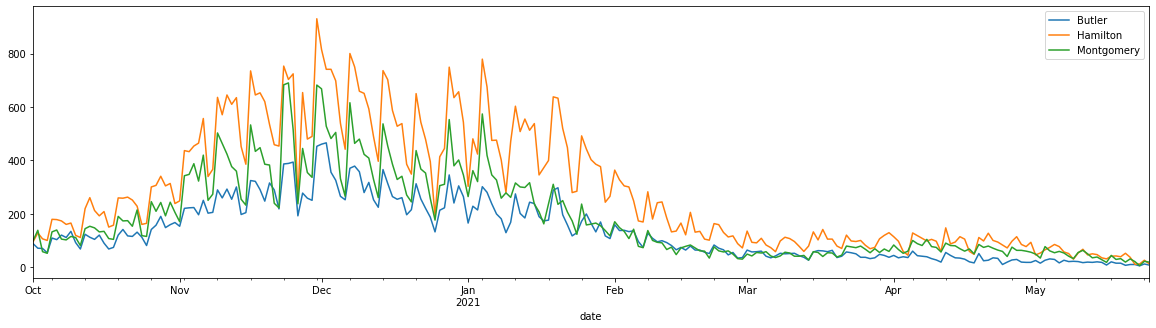

In [7]:
data.plot(figsize=(20,5))

<AxesSubplot:xlabel='date'>

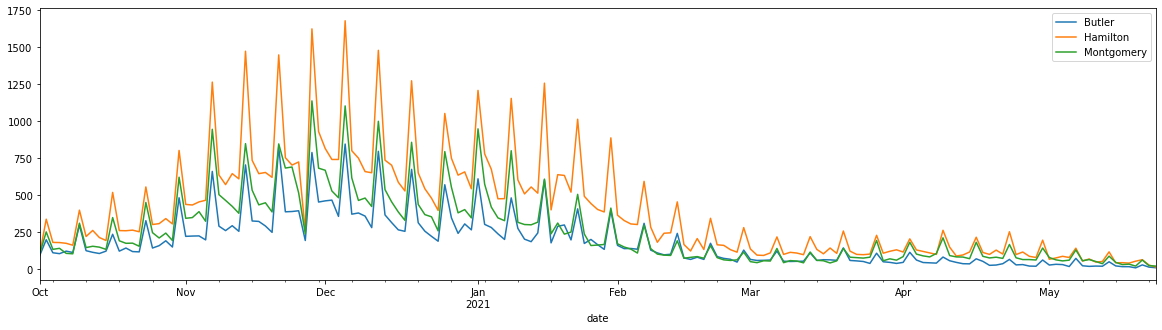

In [8]:
weekly=data.resample('B').sum()
weekly.plot(figsize=(20,5))